<a href="https://colab.research.google.com/github/swarupyeole11/Pandas_Revision/blob/main/Python_OOPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Construtor and __init__

In [ ]:
item1 = 'Phone'
item1_price = 100
item1_qty = 5
item1_price_total = item1_price * item1_qty

print(type(item1))
print(type(item1_price))
print(type(item1_qty))
print(type(item1_price_total))


<class 'str'>
<class 'int'>
<class 'int'>
<class 'int'>


In the above you can see that each datatype is an instance some class in python. So in order to create custom dataypes we use can use




In [ ]:
class Item:
  pass

# instance of class
item1 = Item()
item1.name = 'Phone'
item1.price = 100
item1.quantity = 5

print(type(item1)) # item
print(type(item1.name))  ## assigned string type attribute to the object
print(type(item1.price))
print(type(item1.quantity))


<class '__main__.Item'>
<class 'str'>
<class 'int'>
<class 'int'>


In [ ]:
class Item:
  ##self is used to pass object as the first argument
  def  calculate_total_price(self, x, y):
    return x * y

item1 = Item()
item1.name = 'Phone'
item1.price = 100
item1.quantity = 5
print(item1.calculate_total_price(item1.price, item1.quantity))

item2 = Item()
item2.name = 'Laptop'
item2.price = 1000
item2.quantity = 3
print(item2.calculate_total_price(item2.price, item2.quantity))


500
3000


The use of constructor is to avoid above haasle of independently specifying and instead directly pass it through when class is being instantiated

In [ ]:
class Item:
  def __init__(self,name,price,quantity):
    self.price = price   # (self.price) => you are assining the attribute of price to each instance/object    and  =price means it's value is equal to price being passed
    self.quantity = quantity
    self.name = name

  def  calculate_total_price(self):
    return self.price * self.quantity

item1 = Item('Phone',100,5)
item2 = Item('Laptop',1000,3)

print(item1.calculate_total_price())
print(item2.calculate_total_price())

### If you want to assing some attribute to a specific instance you can do that too even after using constructor e.g
item1.has_numpad = False
print(item1.has_numpad)

500
3000
False


1) Python always runs the init method by default

2) Since you pass self to each method and self is the instance of the class all the attributes attached to it are available throughout the class. Hence we were able to use self.price and self.quantity in the calculate_total_price

3) If you want to assing some attribute to a specific instance you can do that too even after using constructor e.g the has_numpad attribute

In [ ]:
class Item:

  def __init__(self,name: str, price : float , quantity=0):
    self.price = price   # (self.price) => you are assining the attribute of price to each instance/object    and  =price means it's value is equal to price being passed
    self.quantity = quantity
    self.name = name

  def  calculate_total_price(self):
    return self.price * self.quantity

item1 = Item('Phone',"100",5)
item2 = Item('Laptop',1000,3)

print(item1.calculate_total_price())
print(item2.calculate_total_price())

100100100100100
3000


1) Note : The above specifying of datatype will only indicate dayatype to pass and not enforce

2) in order to make some specfic validatons we use assert

In [ ]:
class Item:

  def __init__(self,name: str, price : float , quantity=0):

    #validations
    assert type(price) == int and price >= 0, f"Price {price} is not greater than or equal to zero or not an integer"
    assert quantity >= 0, f"Quantity {quantity} is not greater than or equal to zero"

    #instantiation
    self.price = price   # (self.price) => you are assining the attribute of price to each instance/object    and  =price means it's value is equal to price being passed
    self.quantity = quantity
    self.name = name

  def  calculate_total_price(self):
    return self.price * self.quantity

item1 = Item('Phone',100,5)
item2 = Item('Laptop',1000,3)

print(item1.calculate_total_price())
print(item2.calculate_total_price())

500
3000


Till now we learnt about the instace level  attributes

In [ ]:
class Item:

  pay_rate = 0.8 # The pay rate after 20% discount

  def __init__(self,name: str, price : float , quantity=0):

    #validations
    assert type(price) == int and price >= 0, f"Price {price} is not greater than or equal to zero or not an integer"
    assert quantity >= 0, f"Quantity {quantity} is not greater than or equal to zero"

    #instantiation
    self.price = price   # (self.price) => you are assining the attribute of price to each instance/object    and  =price means it's value is equal to price being passed
    self.quantity = quantity
    self.name = name

  def  calculate_total_price(self):
    return self.price * self.quantity

  def newPrice(self):
    ## ALTHOUGH PAYRATE IS CLASS ATTRIBUTE IT HELPS TO USE SELF BECAUSE ANYWAY THE CLASS ATTRIBUTE IS AVAILABLE TO THE INSTANCE THROUGH (SELF) SO WHEN WE USE SELF IT FIRST LOOKS WHETHER
    ## THERE IS A VARIABLE AVAILABLE AT INSTNACE LEVEL AND THEN IF NOT THEN GOES TO THE CLASS LEVEL, YOU CAN CLEARLY SEE THIS WITH ITEM1 WHERE NO INSTANCE LEVEL PAYRATE WAS AVAILABLE
    ## SO IT USED THE CLASSLEVEL BUT WAS OPPOSTIRE FOR ITEM 2
    return self.price * self.pay_rate



item1 = Item('Phone',1000,5)
item2 = Item('Laptop',1000,3)

item2.pay_rate = 0.7

print(item1.newPrice())
print(item2.newPrice())


## TO PRINT ALL ATTRIBUTES ASSOCIATED WE USE THE __dict__ methode

## methods and attributes associated with the class
print(Item.__dict__)

## methods and attributes associated with the instance
print(item1.__dict__)



800.0
700.0
{'__module__': '__main__', 'pay_rate': 0.8, '__init__': <function Item.__init__ at 0x7b48c893d090>, 'calculate_total_price': <function Item.calculate_total_price at 0x7b48c893e950>, 'newPrice': <function Item.newPrice at 0x7b48c893f520>, '__dict__': <attribute '__dict__' of 'Item' objects>, '__weakref__': <attribute '__weakref__' of 'Item' objects>, '__doc__': None}
{'price': 1000, 'quantity': 5, 'name': 'Phone'}


In [ ]:
class Item:

  pay_rate = 0.8 # The pay rate after 20% discount
  all = []

  def __init__(self,name: str, price : float , quantity=0):

    #validations
    assert type(price) == int and price >= 0, f"Price {price} is not greater than or equal to zero or not an integer"
    assert quantity >= 0, f"Quantity {quantity} is not greater than or equal to zero"

    #assining to self object
    self.price = price   # (self.price) => you are assining the attribute of price to each instance/object    and  =price means it's value is equal to price being passed
    self.quantity = quantity
    self.name = name


    # storing all the instanes (as soon as the instance gets created it gets stored )
    Item.all.append(self)


  def  calculate_total_price(self):
    return self.price * self.quantity


item1 = Item("Phone",100,1)
item2 = Item("Laptop",1000,3)
item3 = Item("Cable",10,5)
item4 = Item("Mouse",50,5)
item5 = Item("Keyboard",75,5)

print(Item.all)


## For printing names of all
for x in Item.all:
  print(x.name)

[<__main__.Item object at 0x7b48c8a990c0>, <__main__.Item object at 0x7b48c8a98ac0>, <__main__.Item object at 0x7b48c8a98a00>, <__main__.Item object at 0x7b48c8a9ac20>, <__main__.Item object at 0x7b48c8a99690>]
Phone
Laptop
Cable
Mouse
Keyboard


Now the way we have representeed the 5 instances is not a great way to do ie better we use the __repr__ method

In [ ]:
class Item:

  pay_rate = 0.8 # The pay rate after 20% discount
  all = []

  def __init__(self,name: str, price : float , quantity=0):

    #validations
    assert type(price) == int and price >= 0, f"Price {price} is not greater than or equal to zero or not an integer"
    assert quantity >= 0, f"Quantity {quantity} is not greater than or equal to zero"

    #assining to self object
    self.price = price   # (self.price) => you are assining the attribute of price to each instance/object    and  =price means it's value is equal to price being passed
    self.quantity = quantity
    self.name = name

    # storing all the instanes (as soon as the instance gets created it gets stored )
    Item.all.append(self)


  def  calculate_total_price(self):
    return self.price * self.quantity


  def __repr__(self):
    return f"Item('{self.name}',{self.price},{self.quantity})"


item1 = Item("Phone",100,1)
item2 = Item("Laptop",1000,3)
item3 = Item("Cable",10,5)
item4 = Item("Mouse",50,5)
item5 = Item("Keyboard",75,5)

print(Item.all)


## For printing names of all
for x in Item.all:
  print(x.name)

[Item('Phone',100,1), Item('Laptop',1000,3), Item('Cable',10,5), Item('Mouse',50,5), Item('Keyboard',75,5)]
Phone
Laptop
Cable
Mouse
Keyboard


Now the repr method shows a better way of showing all the attributes for each instane

## Class VS Static Methods

- Main Difference : The Important difference is that in class method the first argument to the func is passed as refernce to the class , WHEREAS in **static** method there is **no such requirment at all to pass a mandatory argument** refering to class or instance

- e.g  
          @classmethod
          def m1(cls): # Here cls refers to the class itself

          @staticmethod
          def m2() :  # no requirement to pass anything


**When to Use Static Method**

''' It should be something that has relationship with the class ,but not something that should be unique perinstance '''
        
- e.g
         @staticmethod
           def is_integer(num)


**When to Use class Method**

''' It should be something that has relationship with the class, but usually these are used to maipulate different structures of data to instantiate
objects like we have done in the CSV '''

- e.g
        @classmethod
        def instatiate_from_something(cls):

In [ ]:
import csv

class Item:

  pay_rate = 0.8 # The pay rate after 20% discount
  all = []

  def __init__(self,name: str, price : float , quantity=0):

    #validations
    assert type(price) == float and price >= 0, f"Price {price} is not greater than or equal to zero or not an float"
    assert quantity >= 0, f"Quantity {quantity} is not greater than or equal to zero"

    #assining to self object
    self.price = price   # (self.price) => you are assining the attribute of price to each instance/object    and  =price means it's value is equal to price being passed
    self.quantity = quantity
    self.name = name

    # storing all the instanes (as soon as the instance gets created it gets stored )
    Item.all.append(self)


  def  calculate_total_price(self):
    return self.price * self.quantity


  def __repr__(self):
    return f"Item('{self.name}',{self.price},{self.quantity})"


  @classmethod
  def instatiate_from_csv(cls):
    # the code is for reading the items and converting in dict form where keys are the first row
     with open('items.csv','r') as f:
         reader = csv.DictReader(f)
         items = list(reader)

     for item in items:
      ## instantiating the objects
         Item(
             name = item['Name'],
             price = float(item['Price']),
             quantity = int(item['Qty'])
             )

  @staticmethod
  def is_integer(num):
     if isinstance(num,float):
       return num.is_integer()
     elif isinstance(num,int):
       return True
     else:
       return False



Item.instatiate_from_csv()
print(Item.all)




[Item('phone',100.0,1), Item('laptop',1000.0,5), Item('cable',10.0,3), Item('mouse',50.0,2)]


## Inheritance

In [ ]:
class Item:

  pay_rate = 0.8 # The pay rate after 20% discount
  all = []

  def __init__(self,name: str, price : float , quantity=0):

    #validations
    assert type(price) == int and price >= 0, f"Price {price} is not greater than or equal to zero or not an integer"
    assert quantity >= 0, f"Quantity {quantity} is not greater than or equal to zero"

    #assining to self object
    self.price = price   # (self.price) => you are assining the attribute of price to each instance/object    and  =price means it's value is equal to price being passed
    self.quantity = quantity
    self.name = name

    # storing all the instanes (as soon as the instance gets created it gets stored )
    Item.all.append(self)


  def  calculate_total_price(self):
    return self.price * self.quantity


  def __repr__(self):
    return f"Item('{self.name}',{self.price},{self.quantity})"


## For printing names of all
for x in Item.all:
  print(x.name)



class Phone(Item):
  pass


phone1 = Phone("jscPhone10",500,5)
phone1.brokenphones = 1
phone2 = Phone("jscPhone20",700,5)



phone1.brokenphones = 1  this way is not ideal hence we need a new way
**Always Remeber the parent class __init__ constructor also gets executed if you call the child class**

- e.g code
         ```    class Animal:
                   def __init__(self, name):
                    self.name = name

                class Dog(Animal):
                    def __init__(self, name, breed):
                      super().__init__(name)
                      self.breed = breed
          ```

**In what order do the constructors get executes in python answered**.


  


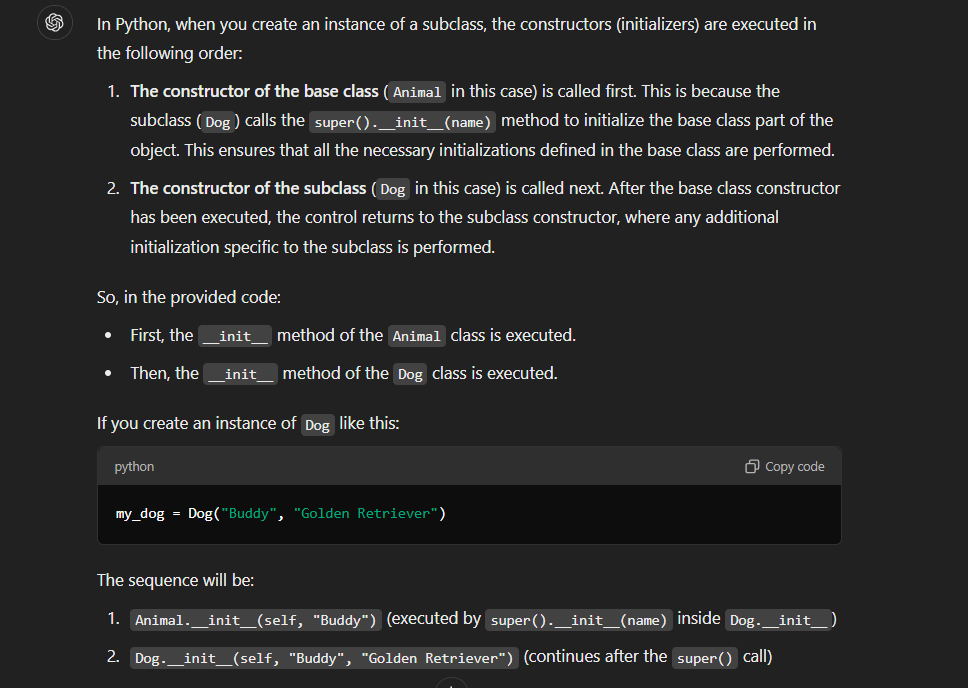

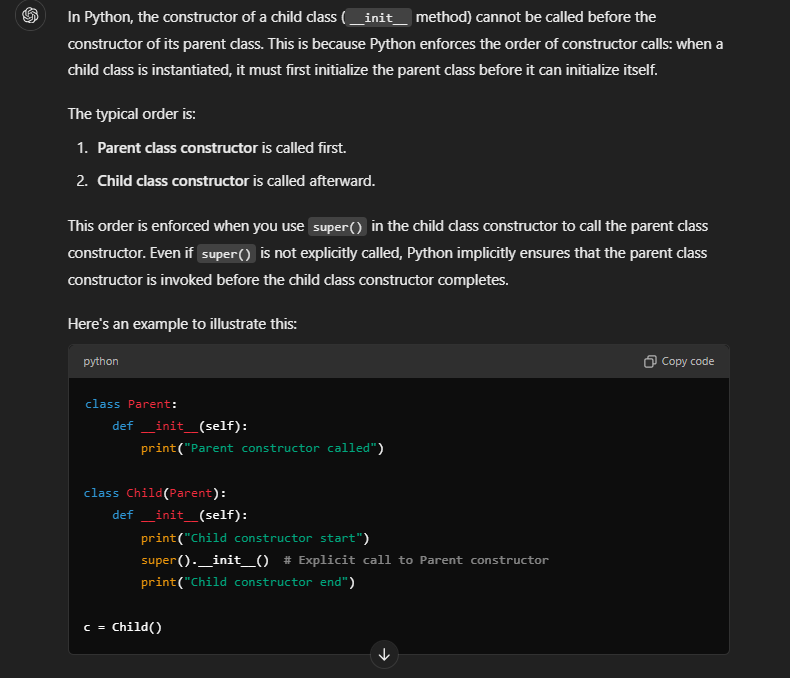

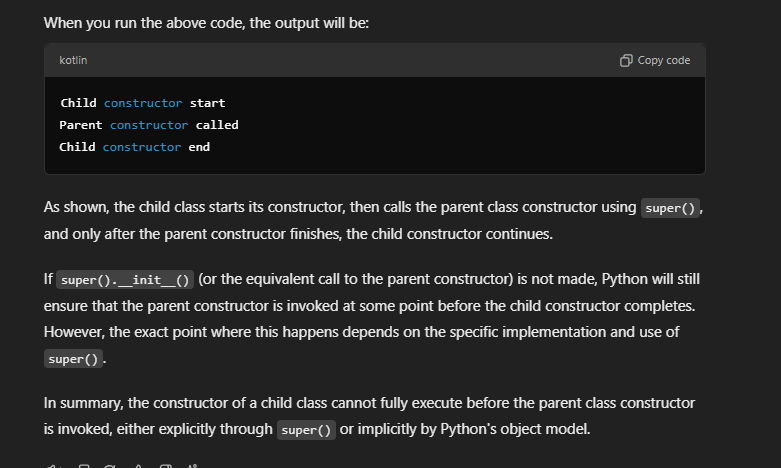

In [1]:
## using constructor for the child class too

class A:
    def method(self):
        print("A")

class B(A):
    def method(self):
        print("B")
        super().method()

class C(A):
    def method(self):
        print("C")
        super().method()

class D(B, C):
    def method(self):
        print("D")
        super().method()

obj = D()
obj.method()


D
B
C
A


Method Resolution Order (MRO)
Method Resolution Order (MRO) is the order in which Python looks for a method or attribute in a hierarchy of classes. This is particularly important in the context of multiple inheritance, where a class inherits from more than one parent class. The MRO determines the sequence in which the base classes are checked when a method or attribute is accessed.

Key Concepts:
Linearization of Classes:

- C3 linearization guarantees that a class always appears before its parents  
  and preserves the order in which the classes are inherited (left-to-right in the inheritance list).
Example:
Given the following classes:

```python
Copy code
class A:
    def method(self):
        print("A")

class B(A):
    def method(self):
        print("B")

class C(A):
    def method(self):
        print("C")

class D(B, C):
    def method(self):
        print("D")
```
The MRO for D can be obtained using the __mro__ attribute or the mro() method:

```
print(D.__mro__)
```

```
(<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>)
```
How MRO Works in the Given Example:
1) Start with the class itself (D).

2) Follow the inheritance chain:
 - Since D inherits from B and C, next in the order are B and C.
 - B and C both inherit from A, so A comes next.

3) Include the base object class:
 - All classes in Python implicitly or explicitly inherit from object.
   The final MRO for D is: D -> B -> C -> A -> object.



